Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.

Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

Year. Number of years in current rank.

Degree. Highest degree. 1 for doctorate, 0 for master's.

YSdeg. Years since highest degree was earned.

Salary. Salary/year in dollars.

Tasks

Find the linear regression equation for this data using columns 1-5 to column 6.

Find the selection of columns with the best  R2  score.

Report whether sex is a factor in salary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

Find the linear regression equation for this data using columns 1-5 to column 6.

In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [6]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [7]:
iqr = df['Year'].quantile(0.75)-df['Year'].quantile(0.25)
upper = df['Year'].quantile(0.75)+(1.5*iqr)
lower = df['Year'].quantile(0.25)-(1.5*iqr)
(upper,lower)

(23.0, -9.0)

In [8]:
iqr = df['YSdeg'].quantile(0.75)-df['YSdeg'].quantile(0.25)
upper = df['YSdeg'].quantile(0.75)+(1.5*iqr)
lower = df['YSdeg'].quantile(0.25)-(1.5*iqr)
(upper,lower)

(48.0, -18.0)

In [9]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

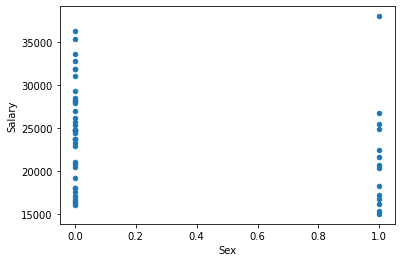

In [10]:
df.plot(x='Sex',y ='Salary',kind = 'scatter')

In [20]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


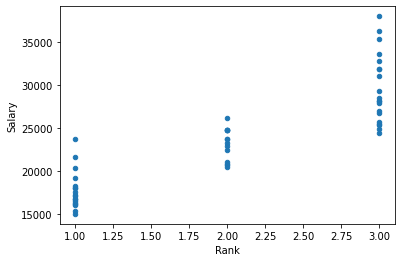

In [21]:
df.plot(x='Rank',y ='Salary',kind = 'scatter')

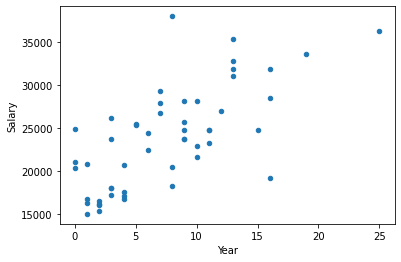

In [22]:
df.plot(x='Year',y ='Salary',kind = 'scatter')

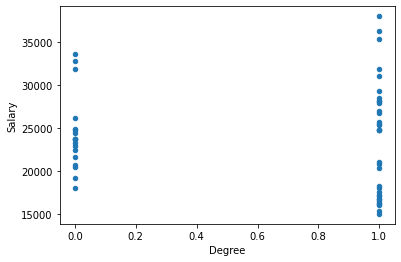

In [23]:
df.plot(x='Degree',y ='Salary',kind = 'scatter')

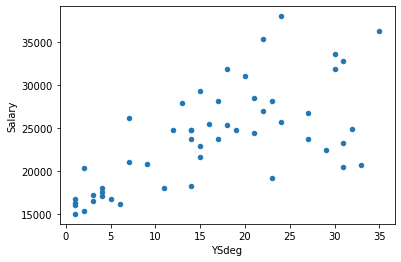

In [24]:
df.plot(x='YSdeg',y ='Salary',kind = 'scatter')

In [25]:
x = df.loc[:,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y = df.loc[:,'Salary'].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression
A= LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

Find the selection of columns with the best R2 score.

In [28]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [29]:
x = df.loc[:,['Sex']].values
y = df.loc[:,'Salary'].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.linear_model import LinearRegression
A= LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn import metrics
A.score(x_test,y_test)

0.10469357361538745

In [33]:
x = df.loc[:,['Rank']].values
y = df.loc[:,'Salary'].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn.linear_model import LinearRegression
A= LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [36]:
from sklearn import metrics
A.score(x_test,y_test)

0.8157698269939715

In [38]:
x = df.loc[:,['Year']].values
y = df.loc[:,'Salary'].values

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [40]:
from sklearn.linear_model import LinearRegression
A= LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [41]:
from sklearn import metrics
A.score(x_test,y_test)

0.24028171242303065

In [42]:
x = df.loc[:,['YSdeg']].values
y = df.loc[:,'Salary'].values

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression
A= LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [45]:
from sklearn import metrics
A.score(x_test,y_test)

-0.010116358437956885

The Best R2-score column is Rank column with the score 81%

Report whether sex is a factor in salary.

the sex R2-score is very less compare to rank so sex is not play major factor in target variable salary